# Data Storytelling - with line chart

In [3]:
import pandas as pd
import duckdb
from constants import GRAY_1, GRAY_2, GRAY_3, BLUE_1

df = pd.read_csv("../../codealongs/02_matblotlib_barline/data/norway_new_car_sales_by_make.csv")
df.head()

,Year,Month,Make,Quantity,Pct
0,2007,1,Toyota,2884,22.7
1,2007,1,Volkswagen,2521,19.9
2,2007,1,Peugeot,1029,8.1
3,2007,1,Ford,870,6.9
4,2007,1,Volvo,693,5.5


In [23]:
df_quantity_barnd = duckdb.query(
    """--sql
    SELECT make as Brand, SUM(Quantity) as Quantity
    FROM df
    GROUP BY make
    ORDER BY Quantity DESC
"""
).df().set_index("Brand")
df_quantity_barnd.head()

,Quantity
Brand,
Volkswagen,206669.0
Toyota,168177.0
Volvo,99937.0
Ford,99713.0
BMW,73315.0


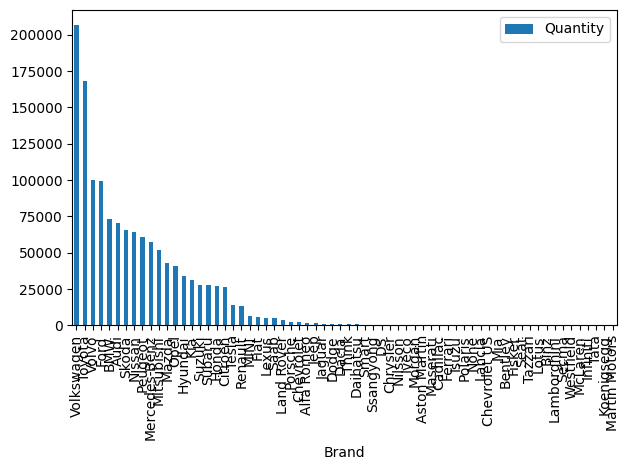

In [24]:
ax = df_quantity_barnd.plot(kind="bar")
fig = ax.get_figure()
fig.tight_layout()
fig.savefig("figures/bars_eda.png")

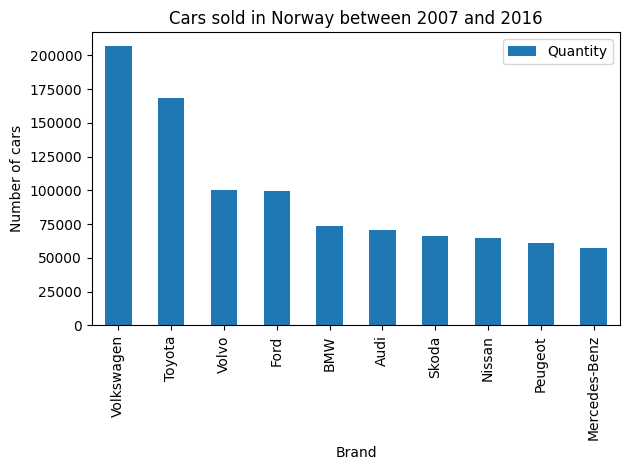

In [25]:
ax = df_quantity_barnd.iloc[:10].plot(kind="bar", title="Cars sold in Norway between 2007 and 2016", ylabel="Number of cars")
fig = ax.get_figure()
fig.tight_layout()
fig.savefig("figures/top_brands.png")

In [58]:
df_percentage = df_quantity_barnd["Quantity"]/df_quantity_barnd["Quantity"].sum()*100
df_percentage

Brand
Volkswagen       15.340063
Toyota           12.482984
Volvo             7.417851
Ford              7.401225
BMW               5.441826
                   ...    
McLaren           0.000074
Infiniti          0.000074
Tata              0.000074
Koenigsegg        0.000074
Martin Motors     0.000074
Name: Quantity, Length: 66, dtype: float64

In [91]:
#Extra for understanding lists class
colors = [GRAY_1]*len(df_percentage_top10)
colors[2] = BLUE_1
colors

['#CCCCCC',
 '#CCCCCC',
 '#1E4E5C',
 '#CCCCCC',
 '#CCCCCC',
 '#CCCCCC',
 '#CCCCCC',
 '#CCCCCC',
 '#CCCCCC',
 '#CCCCCC']

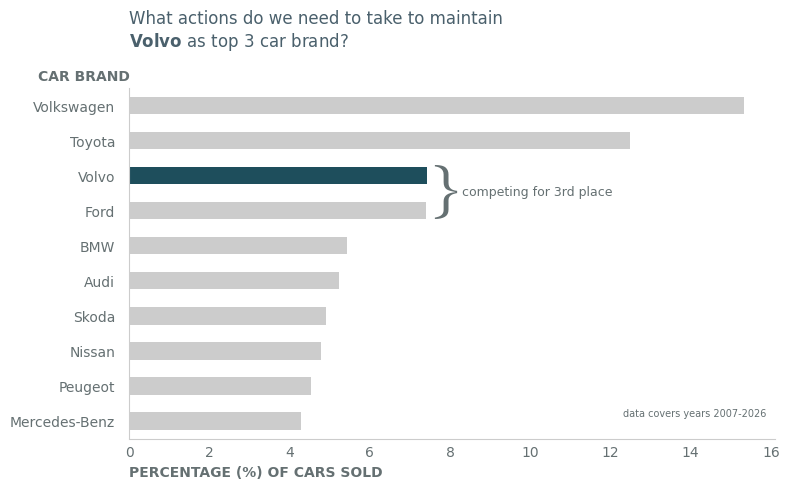

In [120]:
df_percentage_top10 = df_percentage.iloc[:10]
ax = df_percentage_top10.plot(
    kind="barh",
    ylabel="Number of cars",
    figsize=(8,5),
    color = colors)

ax.invert_yaxis()

#removing clutter
ax.legend().remove()
ax.spines[["top", "right"]].set_visible(False)

#contrast
ax.spines[["left", "bottom"]].set_color(GRAY_1)
ax.tick_params(axis="both", colors=GRAY_2, length=0, pad = 5)
ax.tick_params(axis="y", pad = 10)

#descriptive title and labels
#adding LaTeX 
ax.set_title("What actions do we need to take to maintain\n" + r"$\bf{Volvo}$" + " as top 3 car brand?", loc = "left", pad = 30, color = GRAY_3)

ax.set_xlabel("PERCENTAGE (%) OF CARS SOLD", loc = "left", color = GRAY_2, fontweight="bold")
ax.set_ylabel("CAR BRAND", color = GRAY_2, rotation=0, fontweight="bold")
ax.yaxis.set_label_coords(-0.07,1.015)

#color sparingly, see above

#annotations to clarify
ax.annotate(xy=(7.5,2.9), text= "}", fontsize=45, family="Times", color=GRAY_2)
ax.annotate(xy=(8.3,2.55), text= "competing for 3rd place", fontsize=9, color=GRAY_2)
ax.annotate(xy=(12.3,8.85), text= "data covers years 2007-2026", fontsize=7, color=GRAY_2)


fig = ax.get_figure()
fig.tight_layout()
fig.savefig("figures/story1.png")